In [1]:
import numpy as np
from network import flatten_NN, reconstruct_NN
from typing import List, Tuple
from mate import mate
import pandas as pd
import matplotlib.pyplot as plt
from helper_module import split_train_set, split_train_test_sets
from numpy.typing import NDArray
from fitness import fitness, regime, compute_population_fitness, evaluate_nn
from initialize_nn import initialize_nn, test_init_nn
from initialize_population import initialize_population
from selection import keep_elites, selection
import random
from mate import mate, reproduce_population, reduce_population
from checkpoint import checkpoint, load_checkpoint
from evolution import run_evolution
import os

                Close       Open       High        Low   Volume
Date                                                           
1986-01-02   172.6575   172.6575   172.6575   172.6575    600.0
1986-01-03   172.6575   172.6575   172.6575   172.6575   1900.0
1986-01-06   175.4879   175.4879   175.4879   175.4879   2800.0
1986-01-07   181.1488   175.4879   181.1488   175.4879   3200.0
1986-01-09   181.1488   181.1488   181.1488   181.1488   2600.0
...               ...        ...        ...        ...      ...
2023-09-12  1781.0000  1786.0000  1809.0000  1781.0000  12985.0
2023-09-13  1787.0000  1799.0000  1799.0000  1781.0000  16850.0
2023-09-14  1795.0000  1795.0000  1795.0000  1782.0000  12070.0
2023-09-15  1752.0000  1795.0000  1810.0000  1752.0000  29105.0
2023-09-18  1752.0000  1789.0000  1789.0000  1752.0000  27225.0

[8861 rows x 5 columns]


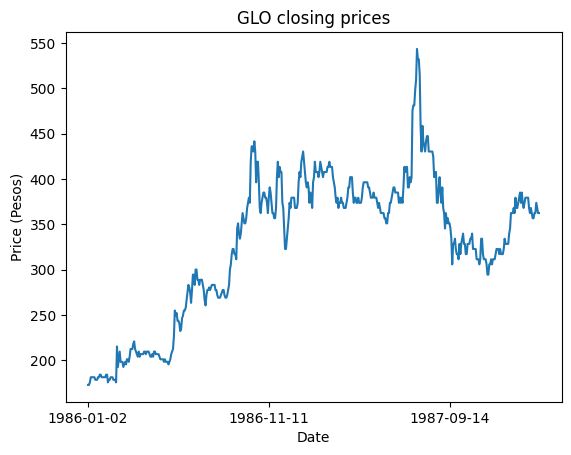

In [2]:
# read and print sample historical stock price data
series = pd.read_csv('../../Data/PH-historical-stock-price-data-csv/GLO.csv', header = 0, index_col = 'Date')
print(series)

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(series['Close'].head(500))
ax.set_xticks(ax.get_xticks()[::200])
plt.show()

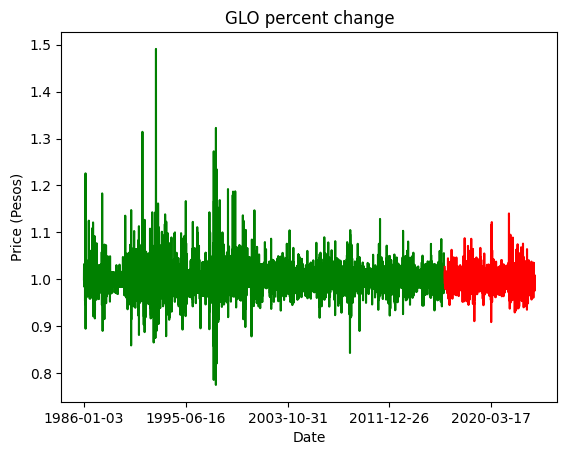

In [3]:
# use only the closing prices of the stock
series = series['Close']
series = series.pct_change(1) + 1
series = pd.Series(data = series, name = 'Close_pct_change')

# split data into train and test sets
train, test = split_train_test_sets(series)

# plot the train and test sets
fig, ax = plt.subplots()    
ax.set_title('GLO percent change')
ax.set_xlabel('Date')
ax.set_ylabel('Price (Pesos)')
ax.plot(train, 'g')
ax.plot(test, 'r')
ax.set_xticks(ax.get_xticks()[::2000])
plt.show()

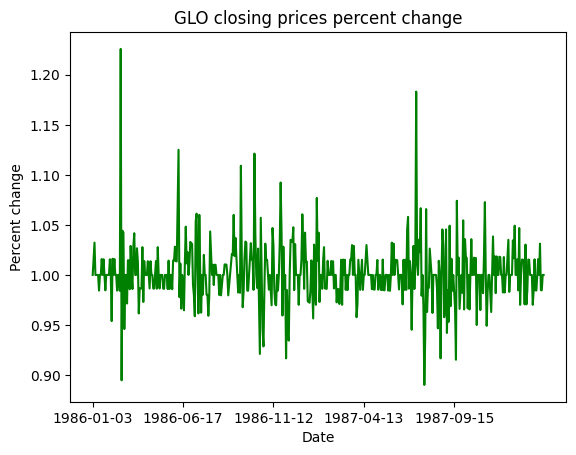

In [4]:
# split the train set into multiple batches
train_set = split_train_set(train)

# plot a sample of the train set
fig, ax = plt.subplots()    
ax.set_title('GLO closing prices percent change')
ax.set_xlabel('Date')
ax.set_ylabel('Percent change')
ax.plot(train_set[0], 'g')
ax.set_xticks(ax.get_xticks()[::100])
plt.show()

In [5]:
# initialize neural network
net = initialize_nn()

# flatten neural network
test_flat_NN, test_num_layers, test_NN_layers_dims = flatten_NN(net)

# reconstruct neural network
test_reconstructed_NN = reconstruct_NN(flat_NN = test_flat_NN, 
                                       num_layers = test_num_layers, 
                                       NN_layer_dims = test_NN_layers_dims)

test_offspring1, test_offspring2 = mate(net, test_reconstructed_NN)

In [6]:
# test the neural networks, its reconstruction and offsprings
test_sample = np.zeros([1,150])
for i in range(150):
    test_sample[0][i] = np.random.uniform(0,1)

print(net.propagate_forward(test_sample))
print(test_reconstructed_NN.propagate_forward(test_sample))
print(test_offspring1.propagate_forward(test_sample))
print(test_offspring2.propagate_forward(test_sample))
print(np.argmax(test_offspring1.propagate_forward(test_sample)))
print(np.argmax(test_offspring2.propagate_forward(test_sample)))

[[2.81655095e-38 1.00000000e+00 4.25566985e-78]]
[[4.67285856e-62 1.00000000e+00 2.17728135e-99]]
[[4.79075948e-37 1.00000000e+00 1.25904634e-44]]
[[1.83980296e-50 1.00000000e+00 1.05622892e-56]]
1
1


In [7]:
# population = list()
# population = initialize_population(num_individuals=100)

# # start from generation 0
# population = run_evolution(population = population, 
#                            num_generations = 100, 
#                            train_set = train_set, 
#                            checkpoint_filepath = './checkpoint', 
#                            checkpoint_interval = 10)

In [8]:
population = load_checkpoint(checkpoint_filepath = './checkpoint/1659.pkl')

# start from a checkpoint
population = run_evolution(population = population, 
                           starting_generation = 1670, 
                           num_generations = 30, 
                           train_set = train_set, 
                           checkpoint_filepath = './checkpoint',
                           checkpoint_interval = 10)

Generation: 1670 -> 7.37
Mutation rate: 0.10
Generation: 1671 -> 8.47
Mutation rate: 0.10
Generation: 1672 -> 3.42
Mutation rate: 0.10
Generation: 1673 -> 4.95
Mutation rate: 0.10
Generation: 1674 -> 6.62
Mean historical average fitness: 6.168045395989246
Mutation rate: 0.10
Generation: 1675 -> 4.27
Mean historical average fitness: 5.54843119791785
Mutation rate: 0.15
Generation: 1676 -> 5.67
Mean historical average fitness: 4.987706220446997
Mutation rate: 0.10
Generation: 1677 -> 7.81
Mean historical average fitness: 5.864102715826712
Mutation rate: 0.05
Generation: 1678 -> 9.03
Mean historical average fitness: 6.68028479223642
Mutation rate: 0.10
Generation: 1679 -> 7.79
Mean historical average fitness: 6.913445338846652
Mutation rate: 0.10
Generation: 1680 -> 6.18
Mean historical average fitness: 7.296322725621975
Mutation rate: 0.15
Generation: 1681 -> 9.84
Mean historical average fitness: 8.129503775707382
Mutation rate: 0.10
Generation: 1682 -> 9.40
Mean historical average fitne

In [9]:
for i in range(10):
    test_sample = np.zeros([1,150])
    for i in range(150):
        test_sample[0][i] = np.random.uniform(0,1)

    probabilities = population[0].propagate_forward(test_sample)
    index = np.argmax(probabilities)
    print(probabilities, index)

[[1.00000000e+00 2.83727787e-31 6.95479304e-35]] 0
[[1.00000000e+00 1.28490560e-46 1.22687209e-57]] 0
[[1.11430925e-30 6.59054411e-29 1.00000000e+00]] 2
[[1.00000000e+00 4.86911012e-23 3.32891397e-23]] 0
[[1.03876447e-23 2.90502183e-31 1.00000000e+00]] 2
[[1.00000000e+00 2.21253879e-22 1.43694117e-17]] 0
[[1.00000000e+00 2.37395965e-22 1.17068050e-12]] 0
[[1.00000000e+00 1.18559249e-31 2.19727892e-26]] 0
[[1.42180696e-33 2.98655182e-34 1.00000000e+00]] 2
[[9.99604056e-01 2.33266678e-36 3.95944052e-04]] 0


In [10]:
print(len(population))

10


In [11]:
for individual in population:
    print(individual.fitness)

15.852949249736106
15.192912001391557
15.192912001391557
15.192912001391557
15.192912001391557
15.192912001391557
15.192912001391557
15.192912001391557
15.192912001391557
15.192912001391557


In [12]:
# from fitness import test_fitness
# test_fitness(nn = population[0], window = 150,  train_set = train_set[0], regime = regime)

In [13]:
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#     print(series)

In [45]:
# test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[1], train_set = train_set[0], regime = regime, window = 150)
test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[0], train_set = train, regime = regime, window = 150)
test_fitness, test_bnh_returns, test_strat_returns, test_max_drawdown, test_series, test_strat_sortino_ratio, test_num_trades = evaluate_nn(nn = population[0], train_set = test, regime = regime, window = 150)

In [46]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(test_series)

            Close_pct_change  Regime   Returns  Cumulative_Returns
Date                                                              
1986-01-03          1.000000     NaN  1.000000            0.000000
1986-01-06          1.016393     NaN  1.000000            0.000000
1986-01-07          1.032258     NaN  1.000000            0.000000
1986-01-09          1.000000     NaN  1.000000            0.000000
1986-01-10          1.000000     NaN  1.000000            0.000000
1986-01-13          1.000000     NaN  1.000000            0.000000
1986-01-14          1.000000     NaN  1.000000            0.000000
1986-01-15          0.984375     NaN  1.000000            0.000000
1986-01-17          1.000000     NaN  1.000000            0.000000
1986-01-20          1.000000     NaN  1.000000            0.000000
1986-01-21          1.015873     NaN  1.000000            0.000000
1986-01-22          1.000000     NaN  1.000000            0.000000
1986-01-23          1.015625     NaN  1.000000            0.00

In [47]:
print(test_bnh_returns)
print(test_fitness)
print(test_strat_returns)
print(test_num_trades)
print(test_max_drawdown)

1220.5334260023449
-4625.581683171063
-92.25949946477408
509
0.9555117415532908


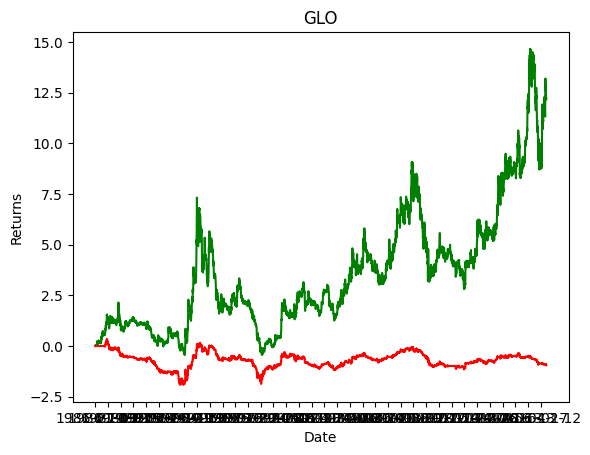

In [48]:
test_series['bnh'] = test_series['Close_pct_change'].cumprod() - 1

# plot historical stock price data
fig, ax = plt.subplots()    
ax.set_title('GLO')
ax.set_xlabel('Date')
ax.set_ylabel('Returns')
ax.plot(test_series.index, test_series['bnh'], color = 'g')
ax.plot(test_series.index, test_series['Cumulative_Returns'], color = 'r')
ax.set_xticks(ax.get_xticks()[::200])
plt.show()

In [28]:
checkpoint(population = population, generation_number = 99999, checkpoint_filepath = './checkpoint')

In [19]:
# from sklearn.cluster import DBSCAN
# from sklearn.preprocessing import StandardScaler
# import numpy as np
# X = np.array([[1, 2], [2, 2], [2, 3],[8, 7], [8, 8], [25, 80]])
# clustering = DBSCAN(eps=3, min_samples=2).fit(X)
# print(clustering.labels_)
# DBSCAN(eps=3, min_samples=2)